<a href="https://colab.research.google.com/github/edelgado-1975/PythonSena/blob/main/20_archivos_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

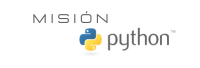

# Gestión de archivos JSON (JavaScript Object Notation)

Los archivos JSON son usados para el almacenamiento e intercambio de datos estructurados.  Algunos usos comunes son:

*   Intercambio de datos en aplicaciones web

*   Almacenamiento de datos

*   Configuración de aplicaciones

*   Integración de sistemas


Además de JSON existen otros formatos para el almacenamiento e intercambio de datos como el **XML** eXtensible Markup Language.  El uso de un formato o del otro depende de las necesidades específicas, sin embargo, el formato JSON es actualmente el más popular.  

Algunas razones:

*   Tamaño
*   Facilidad de uso
*   Adopción por parte de APIs Web modernas


En el siguiente ejemplo veremos ambos formatos de intercambio de datos y apreciaremos sus principales diferencias:

**XML**


```
<libro>
  <titulo>El Principito</titulo>
  <autor>Antoine de Saint-Exupéry</autor>
  <genero>Fábula</genero>
  <publicacion>
    <fecha>1943-04-06</fecha>
    <editorial>
      <nombre>Éditions Gallimard</nombre>
      <ciudad>París</ciudad>
      <pais>Francia</pais>
    </editorial>
  </publicacion>
</libro>

```
**JSON**


```
{
  "titulo": "El Principito",
  "autor": "Antoine de Saint-Exupéry",
  "genero": "Fábula",
  "publicacion": {
    "fecha": "1943-04-06",
    "editorial": {
      "nombre": "Éditions Gallimard",
      "ciudad": "París",
      "pais": "Francia"
    }
  }
}
```




## Sintaxis

La sintaxis general de un archivo JSON básico es la que se utiliza en los diccionarios en Python.

```
{"clave1": <valor1>, "clave_n": <valor_n>}
```
Ejemplo:  Almacenar en un archivo Json los datos id, nombre y fecha de nacimiento de una persona:



```
{
  "id": 1,
  "nombre": "Juan",
  "fecha_nac": "01/01/2005"
}
```

Como podemos ver, las claves siempre deben ser cadenas, pero los valores pueden ser de diversos tipos (números, cadenas, booleanos, arreglos o incluso otros objetos JSON.





**Cuando el valor es una cadena**


```
  "institucion": "SENA"

```
**Cuando el valor es un número**


```
  "edad": 49

```
**Cuando el valor es un booleano**


```
  "activo": true

```
**Cuando el valor es un arreglo**


```
  "deportes": ["Futbol", "Tenis", "Natación"]

```
**Cuando el valor es otro Json**


```
"direccion": {
              "principal": "Av. Bolivar",
              "numero": 45,
              "ciudad": "Manizales",
              "pais": "Colombia"
             }

```

## El módulo json

Python nos proporciona un módulo incorporado por defecto para facilitar la gestión de archivos JSON.  La forma de importarlo es:


```
import json
```




### Convertir objetos JSON a diccionarios Python

Dado que un objeto JSON es una cadena de texto, debemos encontrar la manera de obtener su contenido de manera estructurada y una buena manera de hacerlo es a través de los diccionarios (por aquello de su clave: valor).

Para convertir una cadena de texto en formato JSON a un diccionario Python, el módulo json nos provee una función llamada **loads()**.  Miremos

In [ ]:
import json

texto_json = """{

                  "nombre": "Juan",
                  "institucion": "SENA",
                  "edad": 49,
                  "activo": true,
                  "deportes": ["Futbol", "Tenis", "Natación"],
                  "direccion": {
                                "principal": "Av. Bolivar",
                                "numero": 45,
                                "ciudad": "Manizales",
                                "pais": "Colombia"
                                }
                }
              """

diccionario = json.loads(texto_json)
print (type(diccionario))
print ("Diccionario completo:\n", diccionario)
print ("Solo la institución: ", diccionario["institucion"])
print ("Solo la dirección: ", diccionario["direccion"])
print ("Su segundo deporte favorito: ", diccionario["deportes"][1])

### Convertir diccionarios Python a cadenas de texto con formato JSON

El intercambio de datos entre aplicaciones nos exige sacar los datos de nuestro programa para ser transmitidos a otra aplicación y en esos casos es útil generar cadenas de texto en formato JSON.

El módulo json nos proporciona la función **dumps()** que se encarga de esto:



```
texto_json = json.dumps(diccionario)
```



In [ ]:
dicci = {"3": "tres", "2": "dos"}
print(dicci["3"])

In [ ]:
import json

diccionario = {'marca': "mazda", "modelo": 2023, "accesorios": ["ABS", "vidrios", "sensores"]}

texto_json = json.dumps(diccionario, indent=4)
print (type (texto_json))
print (texto_json)


Podemos crear el texto con una indentación que facilite su lectura incluyendo el parámetro opcional **indent** de la función dumps()


```
texto_json = json.dumps(diccionario, indent=4)
```



In [ ]:
import json

diccionario = {"marca": "mazda", "modelo": 2023, "accesorios": ["ABS", "vidrios", "sensores"]}

texto_json = json.dumps(diccionario, indent=4)
print (texto_json)


### Serialización y deserialización de objetos

La serialización de objetos se refiere al proceso de tomar objetos en memoria y convertirlos en un formato apto para su almacenamiento y/o transmisión a través de la red.  Por su parte, la deserialización es el proceso contrario, toma un archivo o texto en formato apto para su transmisión por la red y lo convierte en un objeto dentro de la aplicación.

Dado que los diccionarios son objetos, el proceso de serialización y deserialización ya lo hemos realizado antes.  Sin embargo, estos procesos los podemos aplicar también sobre instancias de clases definidas por el usuario.  Veamos

#### Serialización


In [ ]:
import json

class Aprendiz:
  def __init__(self, nombre, edad, sexo):
    self.nombre = nombre
    self.edad = edad
    self.sexo = sexo

aprendiz1 = Aprendiz ("Juan", 35, "M")
aprendiz2 = Aprendiz ("Lina", 41, "F")

#Serialización de los objetos
serializado1 = json.dumps(aprendiz1.__dict__, indent=4) #convertimos el objeto a diccionario

serializado2 = json.dumps(aprendiz2.__dict__, indent=4) #y lo pasamos a la función dumps

print ("objeto 1 serializado\n",serializado1)
print ("objeto 2 serializado\n",serializado2)



#### Deserialización

In [ ]:
import json

serializado1 = """
 {
    "nombre": "Juan",
    "edad": 35,
    "sexo": "M"
}
"""
serializado2 = """
 {
    "nombre": "Lina",
    "edad": 41,
    "sexo": "F"
}
"""

#Deserialización de los objetos
dic1 = json.loads (serializado1)
aprendiz1 = Aprendiz (dic1["nombre"], dic1["edad"], dic1["sexo"])
dic2 = json.loads (serializado2)
aprendiz2 = Aprendiz (dic2["nombre"], dic2["edad"], dic2["sexo"])

print (f"Datos del aprendiz1:\nnombre:{aprendiz1.nombre} edad: {aprendiz1.edad} sexo: {aprendiz1.sexo}")
print (f"Datos del aprendiz2:\nnombre:{aprendiz2.nombre} edad: {aprendiz2.edad} sexo: {aprendiz2.sexo}")


## Archivos JSON externos

La verdadera esencia de la Serialización/Deserialización se da cuando obtenemos la información de archivos externos y sacamos la información de nuestra aplicación hacia archivos externos.

Los archivos JSON "curiósamente" tienen la extensión **.json**.  

Para nuestra práctica vamos a crear un archivo llamado **auditoria.json**  El contenido del archivo es el siguiente:


```
[
  {
    "ip": "192.228.17.57",
    "fecha": "2023-01-01",
    "hora": "17:50:12",
    "operacion": "lectura",
    "autenticado": true
  },
  {
    "ip": "192.228.17.82",
    "fecha": "2023-01-01",
    "hora": "17:51:01",
    "operacion": "escritura",
    "autenticado": false
  },
  {
    "ip": "192.228.17.93",
    "fecha": "2023-01-01",
    "hora": "17:52:23",
    "operacion": "escritura",
    "autenticado": true
  }
]
```



### Lectura de un archivo JSON





In [ ]:
import json

with open("auditoria.json") as archivo_json:
  audit = json.load(archivo_json)

print(audit)

La función **load()** del módulo json permite hacer la lectura del archivo .json y devuelve el objeto adecuado.  En este caso, una lista de diccionarios.  En este momento ya hemos realizado la deserialización tomando como fuente un archivo .json externo.  Una vez deserializado, podemos realizar cualquier cantidad de operaciones.

Ejemplo, Mostrar la información de los registros no autenticados:

In [ ]:
import json

with open("auditoria.json") as archivo_json:
  audit = json.load(archivo_json)

print ("No autenticados")
for registro in audit:
  if registro["autenticado"] == False:
      print ("ip:",registro["ip"])
      print ("fecha:",registro["fecha"])
      print ("hora:",registro["hora"])
      print ("operacion:",registro["operacion"])
      print ("autenticado:",registro["ip"])

### Escritura de un archivo JSON

Para escribir en un archivo .json usamos la función **dump()** del módulo json dentro del gestor de contexto.  Miremos



Supongamos que queremos llevar las notas de los aprendices a un archivo .json

In [ ]:
import json

aprendices = [
              {"nombre": "Juan",
               "grupo": "25091",
               "competencias": {"etica": "A","Ingles":"A"}
              },
              {"nombre": "Pedro",
               "grupo": "25093",
               "competencias": {"etica": "A","Ingles":"D"}
              },
              {"nombre": "Lina",
               "grupo": "25091",
               "competencias": {"etica": "D","Ingles":"A"}
              }
             ]
with open("aprendices.json","w") as archivo_json:
    json.dump(aprendices,archivo_json, indent=4)

La magia ocurre en las líneas 18 y 19.  La línea 18 abre o crea el archivo y en la 19 se envía la información de la lista al archivo.

#Apropiación

Cree una aplicación con interfaz gráfica Tkinter que contenga un botón con el título "Exportar Datos".  Al usuario dar click en este botón, la aplicación debe obtener todos los registros de la tabla "instructor" que se encuentra en la base de datos "sena" de SQLite.  Estos registros deben ser exportados a un archivo JSON con el nombre "instructores.json"

In [ ]:
contenido_bd = [(111,"Omar"), (222, "Liliana"),(333, "Wilder"),(444, "Guillermo")]
preparo_json = [{"id":registro[0], "nombre":registro[1]} for registro in contenido_bd]
print (preparo_json)



---

